In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import os
import math

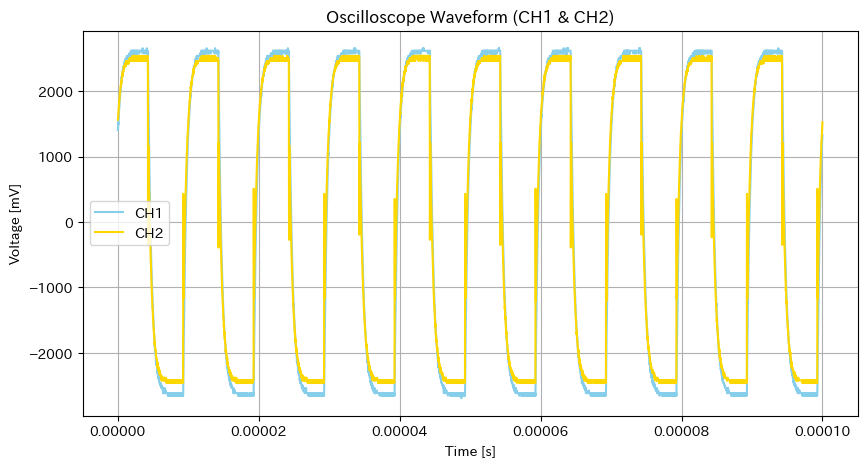

In [16]:
# ファイル名
filename = "../Datasets/1.txt"

# ヘッダーとデータの区切り行を検出
with open(filename, 'r') as f:
    lines = f.readlines()

# データ開始行（"index"を含む行の次）
for i, line in enumerate(lines):
    if line.strip().lower().startswith("index"):
        data_start = i
        break

# ヘッダー情報（例：時間間隔）を読み取り
time_interval_line = [line for line in lines if "Time interval" in line][0]
time_interval_str = time_interval_line.split(":")[1].strip().split()[0].replace("uS", "")
time_interval_us = float(time_interval_str)  # μs単位
time_interval_s = time_interval_us * 1e-6    # 秒に変換


# データ読み込み（pandas）
df = pd.read_csv(filename, sep='\t', skiprows=data_start)

# 時間軸を追加
df["Time (s)"] = df["index"] * time_interval_s

# グラフ描画
plt.figure(figsize=(10, 5))
plt.plot(df["Time (s)"], df["CH1_Voltage(mV)"], label="CH1", color='skyblue')
plt.plot(df["Time (s)"], df["CH2_Voltage(mV)"], label="CH2", color='gold')
plt.xlabel("Time [s]")
plt.ylabel("Voltage [mV]")
plt.title("Oscilloscope Waveform (CH1 & CH2)")
plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.show()

#### 描画関数の作成

In [39]:
def plot_files(filenames):
    filenames = [f"../Datasets/{name}" for name in filenames] #パスを指定する。各自のパスを書くこと
    num_files = len(filenames)
    ncols = 2
    nrows = math.ceil(num_files / ncols)

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 3.5 * nrows), sharex=False)
    axs = axs.flatten()  # 配列を1次元化してインデックスしやすくする

    for idx, fname in enumerate(filenames):
        try:
            with open(fname, 'r') as f:
                lines = f.readlines()

            # データ開始行
            for i, line in enumerate(lines):
                if line.strip().lower().startswith("index"):
                    data_start = i
                    break

            # 時間間隔取得
            time_line = [line for line in lines if "Time interval" in line][0]
            time_interval_str = time_line.split(":")[1].strip().split()[0].replace("uS", "")
            time_interval_s = float(time_interval_str) * 1e-6  # μs → s

            #タイトル設定
            title=input("グラフのタイトルを入力: ")

            # データ読み込み
            df = pd.read_csv(fname, sep='\t', skiprows=data_start)
            df["Time (s)"] = df["index"] * time_interval_s

            # グラフ描画（CH1とCH2を同一軸にプロット）
            ax = axs[idx]
            ax.plot(df["Time (s)"], df["CH1_Voltage(mV)"], label="CH1", color='skyblue')
            ax.plot(df["Time (s)"], df["CH2_Voltage(mV)"], label="CH2", color='gold')
            ax.set_title(f"{title}", fontsize=18)
            ax.set_xlabel("t [s]", fontsize=16)
            ax.set_ylabel("V [mV]", fontsize=16)
            ax.grid(True)
            ax.legend(loc="upper right", framealpha=1.0, fontsize=14)

        except Exception as e:
            print(f"ファイル {fname} の読み込み中にエラーが発生しました: {e}")

    # 不要な空欄の軸を非表示（ファイル数が奇数のときなど）
    for j in range(len(filenames), len(axs)):
        fig.delaxes(axs[j])
        
    plt.tight_layout()
    save_name=input("保存するファイル名を入力(.pngをつけること！): ")
    plt.savefig(f"{save_name}")
    plt.show()

#### RCで使用するファイル

・以下の３つを作成

1. 抵抗を10,1k, 100, 22kに変えたもの、Cは9.５n、電源周波数100k一定 ＝ `1.txt~4.txt`
2. Cを9.5n, 1.3n, 100nに変更したもの、抵抗は1k, 源周波数100k一定 = `2.txt, 5, 6`
3. 電源周波数を2 ~ 1024で乗ずつ増やしていったもの、抵抗1k、Cは9.5n = `7,9~18`

#### RLCで使用するファイル

・以下の３つを作成

1. 抵抗を10,1k, 100, 22kに変えたもの、Cは9.５n、電源周波数100k一定 ＝ `19.txt~22.txt`
2. Cを9.5n, 1.3n, 100nに変更したもの、抵抗は1k, 源周波数100k一定 = `21.txt, 23, 24`
3. 電源周波数多分６から２倍ずつ変えていったもの、抵抗1k、Cは9.5n = `25~38だが順番は変なので注意`

グラフのタイトルを入力:  R = $10 \Omega$
グラフのタイトルを入力:  R = $100 \Omega$
グラフのタイトルを入力:  R = $1000 \Omega$
グラフのタイトルを入力:  R = $22 k\Omega$
保存するファイル名を入力(.pngをつけること！):  2-2gragh1.png


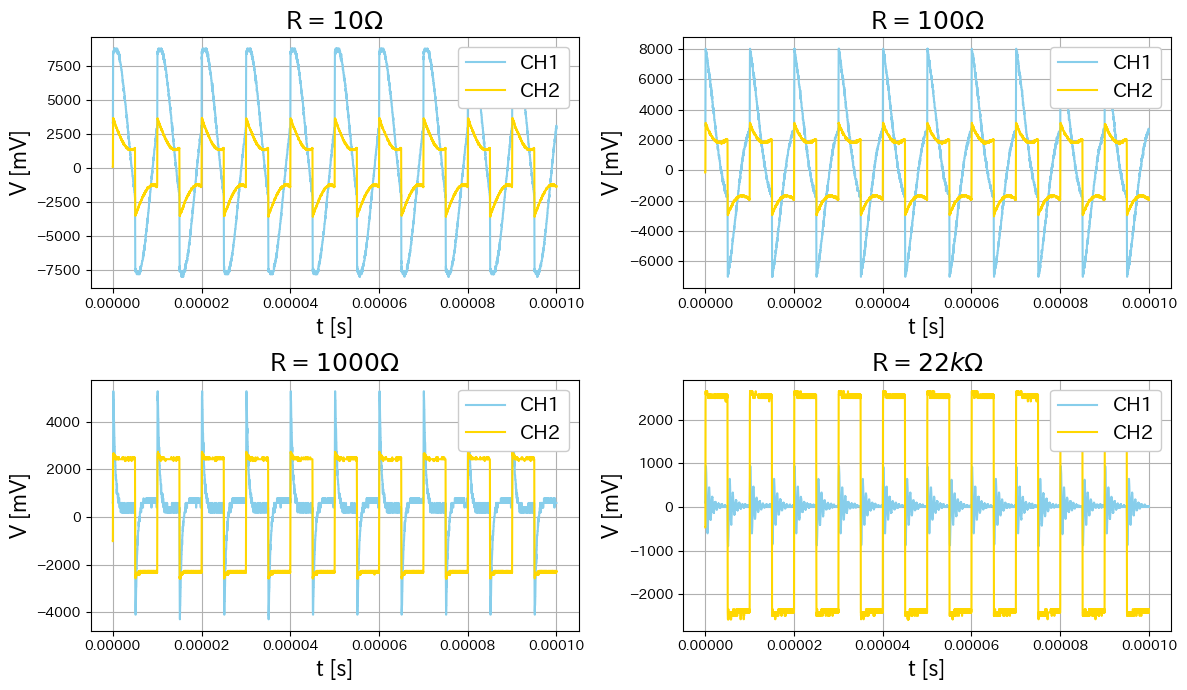

In [40]:
filenames=["19.txt", "20.txt", "21.txt", "22.txt"]
plot_files(filenames)

グラフのタイトルを入力:  C = $9.5 nF$
グラフのタイトルを入力:  C = $1.3 \mu F$
グラフのタイトルを入力:  C = $100 nF$
保存するファイル名を入力(.pngをつけること！):  2-2gragh2.png


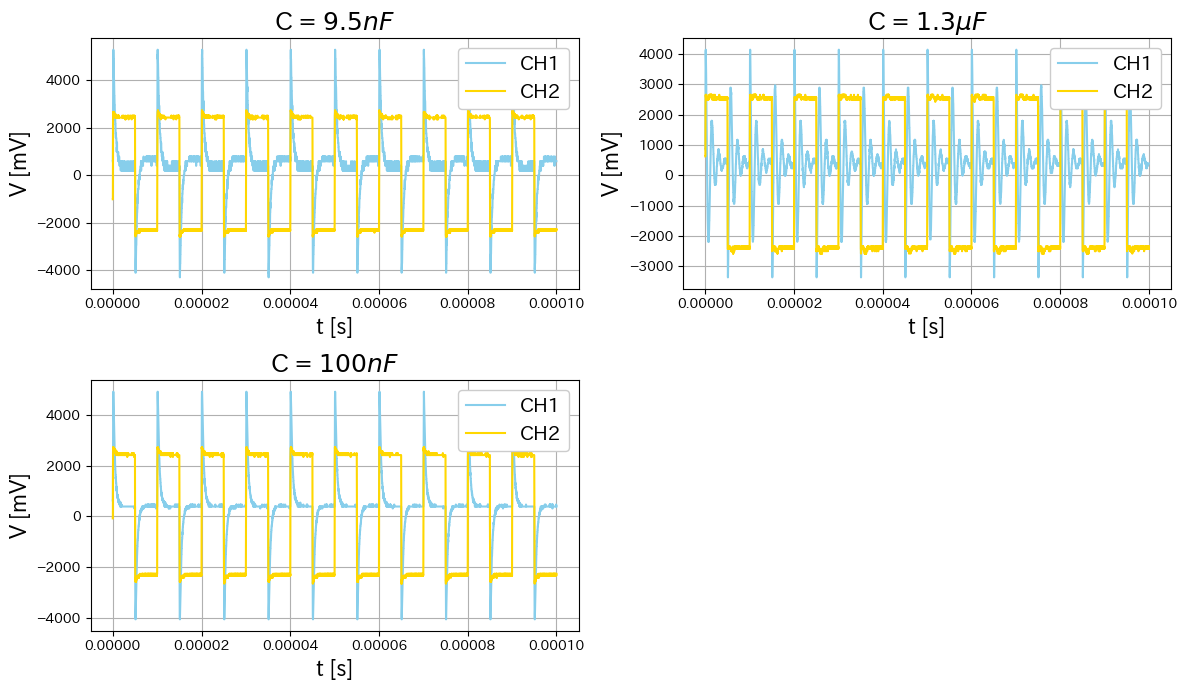

In [41]:
filenames=["21.txt", "23.txt", "24.txt"]
plot_files(filenames)

In [45]:
filenames=["7.txt", "9.txt", "10.txt", "11.txt", "12.txt", "13.txt", "14.txt", "15.txt", "16.txt", "17.txt", "18.txt"]

In [50]:
#3つ目のグラフはx軸が周波数、y軸が電圧の振幅のグラフ作成
import re

def parse_value(s):
    """単位つきの周波数文字列を kHz に変換"""
    s = s.strip()
    if "MHz" in s:
        return float(s.replace("MHz", "")) * 1e3
    elif "kHz" in s:
        return float(s.replace("kHz", ""))
    elif "Hz" in s:
        return float(s.replace("Hz", "")) / 1e3
    else:
        return float(s)

def parse_voltage(s):
    """
    '800.8mV' や '5.3V' などから mV 単位の数値を返す
    """
    match = re.match(r"([0-9.]+)\s*(mV|V)", s.strip())
    if not match:
        raise ValueError(f"不正な電圧形式: '{s}'")
    
    value, unit = match.groups()
    if unit == "V":
        return float(value) * 1e3
    else:  # mV
        return float(value)

def plot_frequency(filenames):
    filenames = [f"../Datasets/{name}" for name in filenames]
    freqs = []
    amps = []

    for fname in filenames:
        try:
            with open(fname, 'r') as f:
                lines = f.readlines()

            # 周波数の取得（CH2）
            freq_line = next(line for line in lines if "Frequency" in line)
            freq_str = freq_line.split()[3]
            freq_khz = parse_value(freq_str)

            # PK-PK の取得（CH1）
            pkpk_line = next(line for line in lines if "PK-PK" in line)
            pkpk_str = pkpk_line.split()[2]
            pkpk_mv = parse_voltage(pkpk_str)  # ← mV 単位
            amplitude = pkpk_mv / 2  # 振幅に変換

            freqs.append(freq_khz)
            amps.append(amplitude)

        except Exception as e:
            print(f"ファイル {fname} の処理中にエラーが発生しました: {e}")

    # 周波数でソート
    combined = sorted(zip(freqs, amps), key=lambda x: x[0])
    freqs_sorted, amps_sorted = zip(*combined)

    # グラフ描画
    plt.figure(figsize=(8, 5))
    plt.plot(freqs_sorted, amps_sorted, marker='o', linestyle='-', color="blueviolet")
    plt.xlim(0,)
    plt.ylim(0,)
    plt.xlabel("周波数 [kHz]", fontsize=14)
    plt.ylabel("振幅 [mV]", fontsize=14)
    plt.title("電圧の振幅の周波数依存性", fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    save_name = input("保存するファイル名を入力（例: graph.png）: ").strip()
    if not save_name.lower().endswith(".png"):
        save_name += ".png"
    plt.savefig(save_name)
    print(f"→ 画像を保存しました: {save_name}")
    plt.show()

保存するファイル名を入力（例: graph.png）:  2-1gragh3.png


→ 画像を保存しました: 2-1gragh3.png


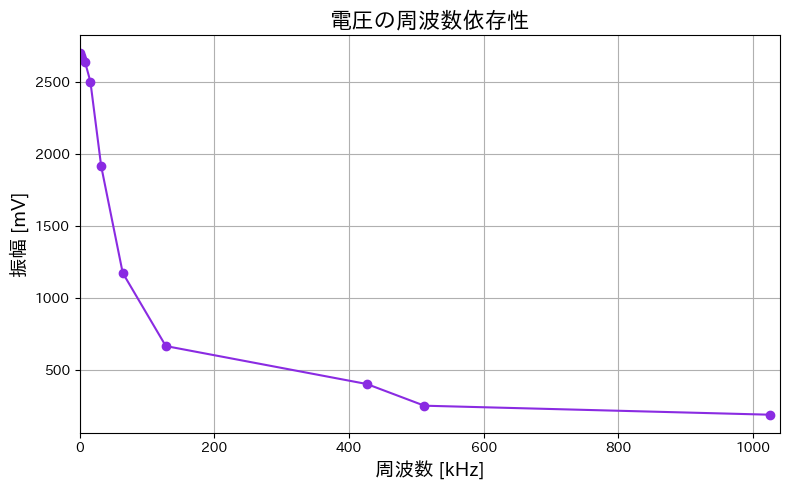

In [46]:
plot_frequency(filenames)

In [47]:
filenames=["25.txt", "26.txt", "27.txt", "28.txt", "29.txt", "30.txt", "31.txt", "32.txt", "33.txt", "34.txt", "35.txt", "36.txt", "37.txt", "38.txt"]

保存するファイル名を入力（例: graph.png）:  2-2graph3.png


→ 画像を保存しました: 2-2graph3.png


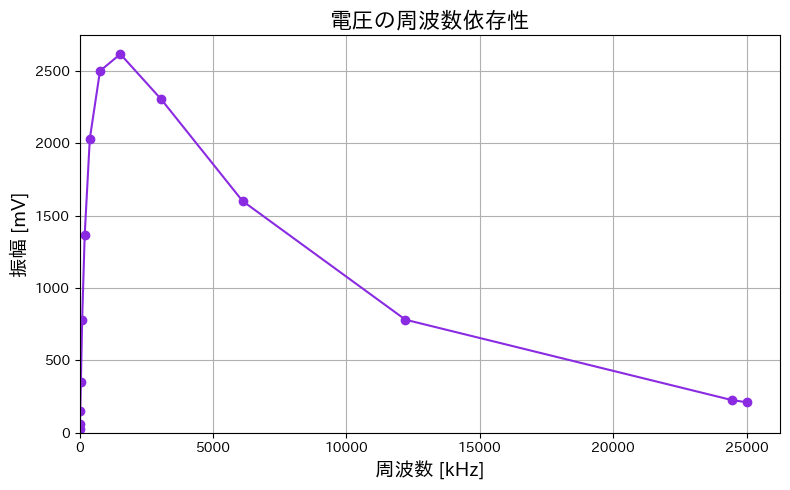

In [51]:
plot_frequency(filenames)

#### 検討課題

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
R = 1000       # オーム
C = 1e-8      # ファラド
V = 1e-3          # ボルト
tau = R * C    # 時定数

# 時間配列
t = np.linspace(0, 5 * tau, 1000)

# Q(t), I(t)
Q = C * V * (1 - np.exp(-t / tau))
I = (V / R) * np.exp(-t / tau)

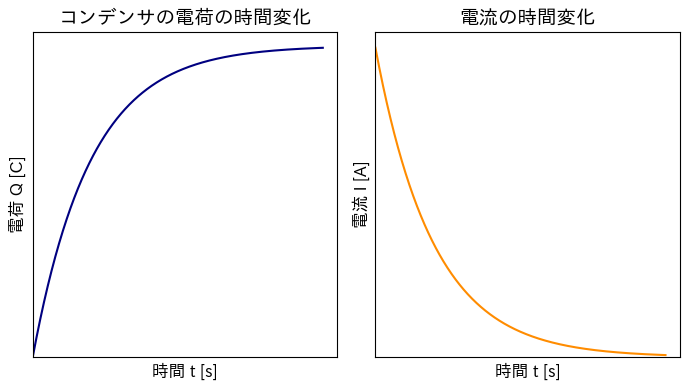

In [91]:
# グラフ描画
plt.figure(figsize=(7, 4))

# 電荷のグラフ
plt.subplot(1, 2, 1)
plt.plot(t, Q, color='navy')
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel('時間 t [s]', fontsize=12)
plt.ylabel('電荷 Q [C]', fontsize=12)
plt.title('コンデンサの電荷の時間変化', fontsize=14)
plt.xticks([])  # x軸の目盛り（数値）を消す
plt.yticks([])  # y軸の目盛り（数値）を消す
plt.grid(True)

# 電流のグラフ
plt.subplot(1, 2, 2)
plt.plot(t, I, color='darkorange')
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel('時間 t [s]', fontsize=12)
plt.ylabel('電流 I [A]', fontsize=12)
plt.title('電流の時間変化', fontsize=14)
plt.xticks([])  # x軸の目盛り（数値）を消す
plt.yticks([])  # y軸の目盛り（数値）を消す
plt.grid(True)

plt.tight_layout()
plt.savefig("kadai1-2")
plt.show()

In [67]:
Q0=C*V
print(Q0)

1.0000000000000001e-11


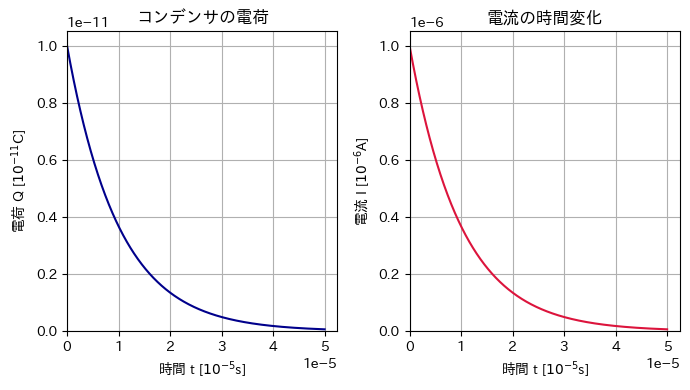

In [88]:
# 時間軸（0 〜 5τ）
t = np.linspace(0, 5 * tau, 1000)

# 電荷と電流
Q = Q0 * np.exp(-t / tau)
I = (Q0 / tau) * np.exp(-t / tau)

# グラフ描画
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# 電荷 Q(t)
axs[0].plot(t, Q, label='Q(t)', color='darkblue')  
axs[0].set_xlabel("時間 t [$10^{-5}$s]")
axs[0].set_ylabel("電荷 Q [$10^{-11}$C]")
axs[0].set_title("コンデンサの電荷")
axs[0].set_xlim(0,)
axs[0].set_ylim(0,)
axs[0].grid(True)

# 電流 I(t)
axs[1].plot(t, I, label='I(t)', color='crimson')
axs[1].set_xlabel("時間 t [$10^{-5}$s]")
axs[1].set_ylabel("電流 I [$10^{-6}$A]")
axs[1].set_title("電流の時間変化")
axs[1].set_xlim(0,)
axs[1].set_ylim(0,)
axs[1].grid(True)

plt.tight_layout()
plt.savefig("kadai1-4")
plt.show()

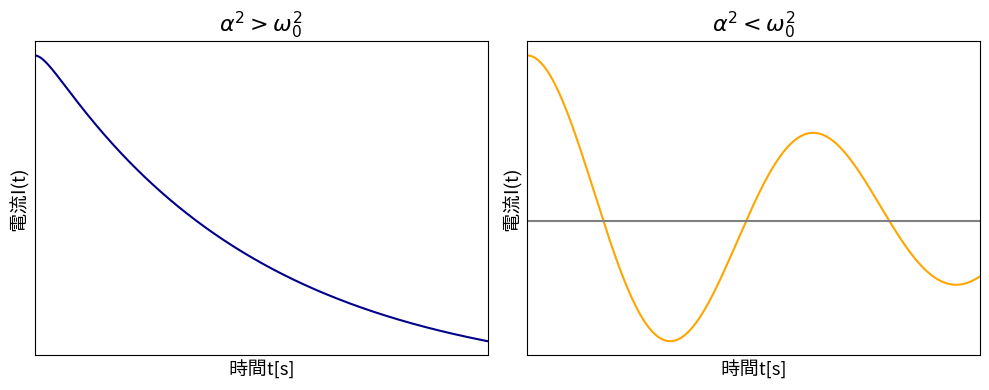

In [144]:
##課題２
import numpy as np
import matplotlib.pyplot as plt

# 共通パラメータ
I0 = 1
L = 1
C = 0.01
omega0 = 1 / np.sqrt(L * C)
t = np.linspace(0, 1, 500)

# === 過減衰（Overdamped） ===
R_over = 50
alpha_over = R_over / (2 * L)
r1 = -alpha_over + np.sqrt(alpha_over**2 - omega0**2)
r2 = -alpha_over - np.sqrt(alpha_over**2 - omega0**2)
A_over = I0 * r2 / (r2 - r1)
B_over = I0 - A_over
I_over = A_over * np.exp(r1 * t) + B_over * np.exp(r2 * t)

# === 不足減衰（Underdamped） ===
R_under = 2
alpha_under = R_under / (2 * L)
omega_d = np.sqrt(omega0**2 - alpha_under**2)
A_under = I0
B_under = alpha_under * I0 / omega_d
I_under = np.exp(-alpha_under * t) * (A_under * np.cos(omega_d * t) + B_under * np.sin(omega_d * t))

# === プロット（横に並べる） ===
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 過減衰
axes[0].plot(t, I_over, color='darkblue')
axes[0].set_title(r"$\alpha^2 > \omega_0^2$", fontsize=16)
axes[0].set_xlabel("時間t[s]", fontsize=14)
axes[0].set_ylabel("電流I(t)", fontsize=14)
axes[0].set_xlim(0, 1)
axes[0].set_xticks([])  
axes[0].set_yticks([]) 

# 不足減衰
axes[1].plot(t, I_under, color='orange')
axes[1].set_title(r"$\alpha^2 < \omega_0^2$", fontsize=16)
axes[1].set_xlabel("時間t[s]", fontsize=14)
axes[1].set_ylabel("電流I(t)", fontsize=14)
axes[1].set_xlim(0, 1)
axes[1].set_xticks([])  
axes[1].set_yticks([]) 

plt.axhline(y=0, color="gray")
plt.tight_layout()
plt.savefig("kadi2-2.png")
plt.show()

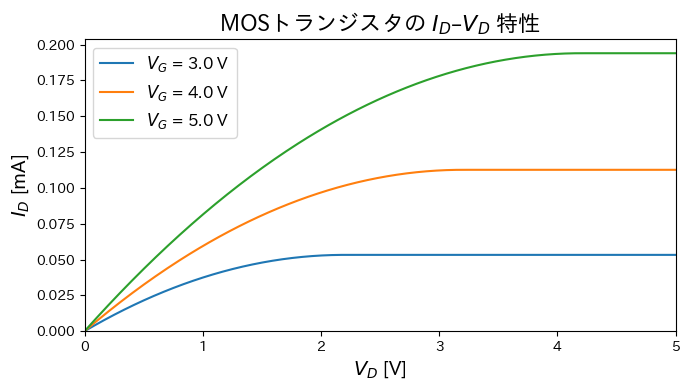

In [115]:
##課題３
k = 2.2e-5
W = 5            # 幅 [m]
L = 5            # 長さ [m]
V_T = 0.8            # 閾値電圧 [V]            

# VDの範囲
V_D = np.linspace(0, 5, 300)

# VGの値を1〜5Vまで変化させてプロット
plt.figure(figsize=(7, 4))
for V_G in range(3, 6):  # V_G = 1, 2, ..., 5
    I_D = []
    for vd in V_D:
        if vd < V_G - V_T:
            id_val = k * (W / L) * ((V_G - V_T) * vd - 0.5 * vd ** 2) * 1e3
        else:
            id_val = 0.5 * k * (W / L) * (V_G - V_T) ** 2 * 1e3
        I_D.append(id_val)
    plt.plot(V_D, I_D, label=f"$V_G$ = {V_G}.0 V")
    
# プロット設定
plt.xlabel("$V_D$ [V]", fontsize=14)
plt.ylabel("$I_D$ [mA]", fontsize=14)
plt.xlim(0,5)
plt.ylim(0,)
plt.title("MOSトランジスタの $I_D$–$V_D$ 特性", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("kadai3-3.png")
plt.show()